In [2]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import rho_plus as rp

is_dark = False
theme, cs = rp.mpl_setup(is_dark)
rp.plotly_setup(is_dark)

In [3]:
%cd ~/cdv

/home/nmiklaucic/cdv


/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})
/home/nmiklaucic/miniconda3/envs/avid/lib/python3.12/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


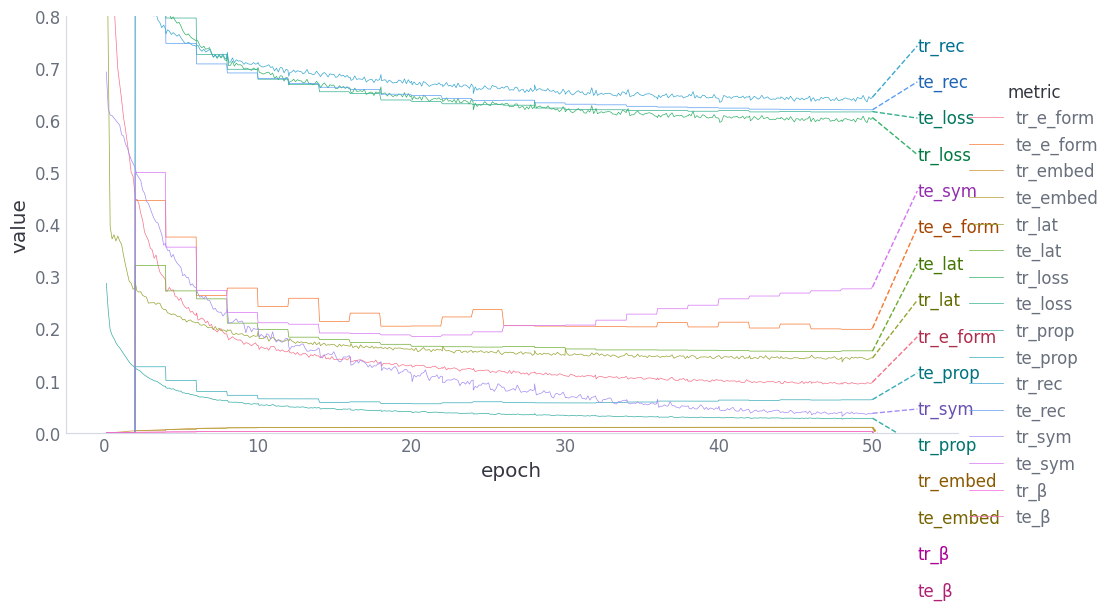

In [38]:
df = pd.read_feather('/home/nmiklaucic/cdv/logs/mace_vae_rec_407/metrics.feather')
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins', 'throughput', 'grad_norm']
mdf2 = mdf[~mdf['metric'].isin(separate_vars)]

ymin, ymax = 0, 0.8

y_last = mdf2.groupby('metric').last()['value']
in_bounds_cols = (y_last < ymax) & (ymin < y_last)
sns.relplot(mdf2[in_bounds_cols[mdf2['metric']].values], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)
# plt.xlim(0, 5)
plt.ylim(ymin, ymax)
rp.line_labels()
# plt.axvline(12)

(0.0, 0.4)

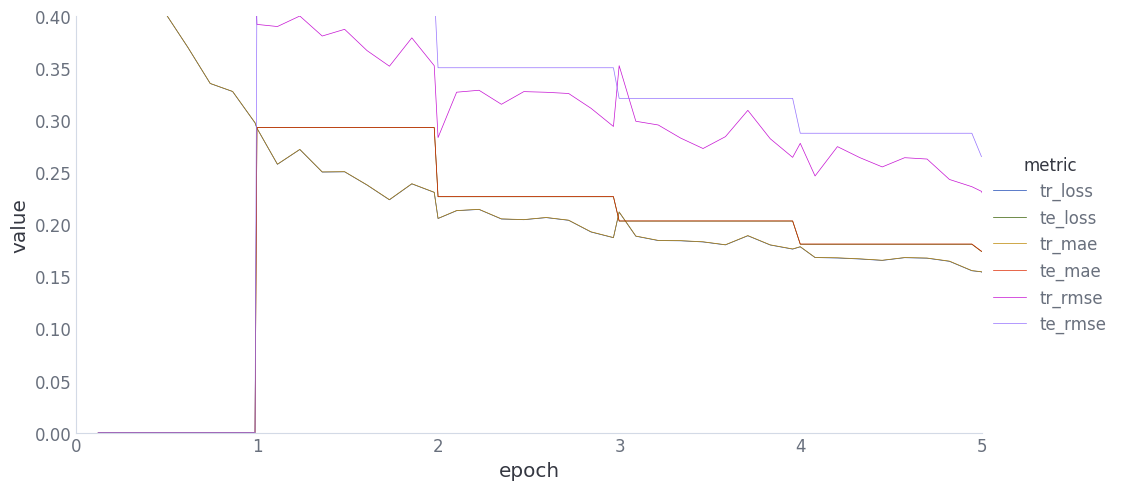

In [24]:
df = pd.read_feather('/home/nmiklaucic/cdv/logs/mace_skipatom_585/metrics.feather')
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins', 'throughput', 'grad_norm']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)
plt.xlim(0, 5)
plt.ylim(0, 0.4)
# plt.axvline(12)

(0.0, 0.5)

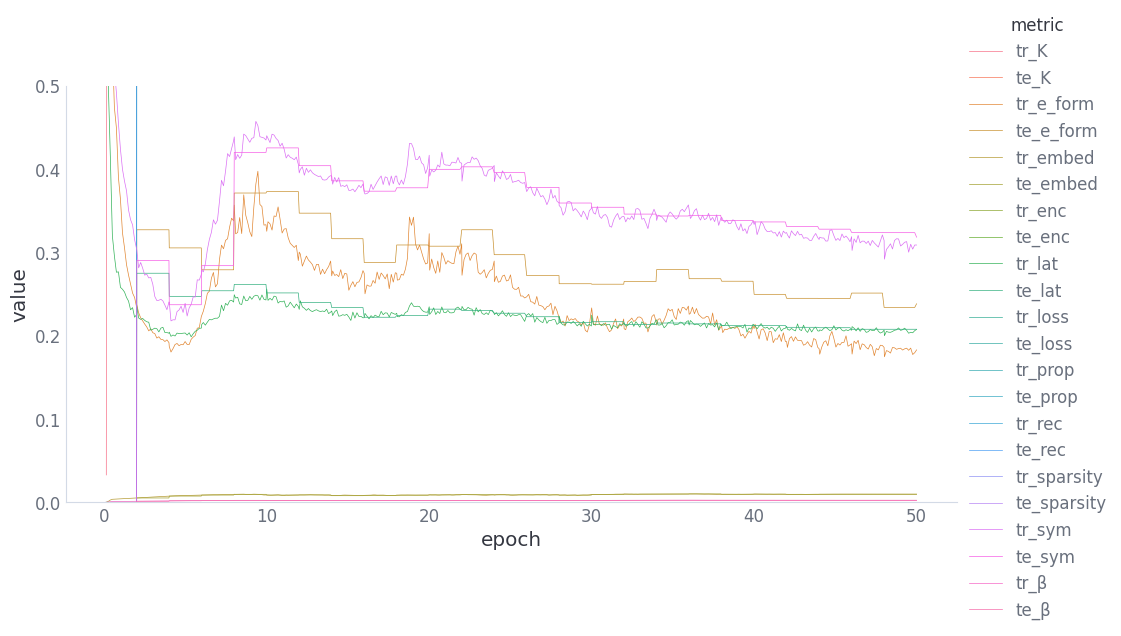

In [37]:
df = pd.read_feather('/home/nmiklaucic/cdv/logs/mace_vae_648/metrics.feather')
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins', 'throughput', 'grad_norm']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)
plt.ylim(0, 0.5)
# plt.axvline(12)

/home/nicholas/programs/rho_plus/rho_plus/smoothing.py:33: RuntimeWarning: divide by zero encountered in divide
  overlap_pct = (overlap_areas / areas).clip(0, 1)


(0.0, 0.3)

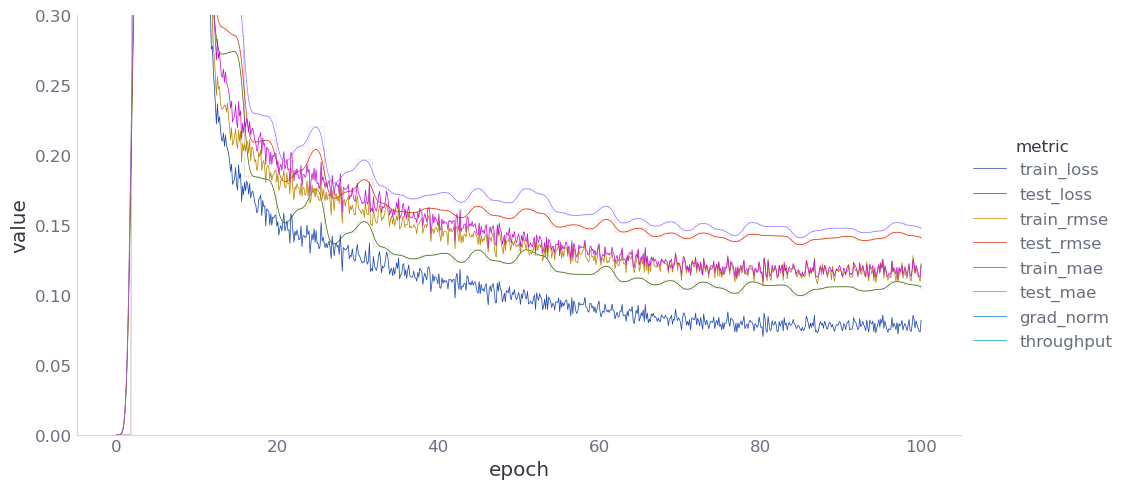

In [14]:
df = pd.read_feather('logs/e_form_no_downsample_564/metrics.feather')
test_cols = [col for col in df.columns if col.startswith('test_')]
df[test_cols] = np.where(df[test_cols] == 1, np.nan, df[test_cols])
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)

rp.smooth_noisy_lines()
plt.ylim(0.0, 0.3)

/home/nicholas/programs/rho_plus/rho_plus/smoothing.py:33: RuntimeWarning: divide by zero encountered in divide
  overlap_pct = (overlap_areas / areas).clip(0, 1)


(0.0, 0.3)

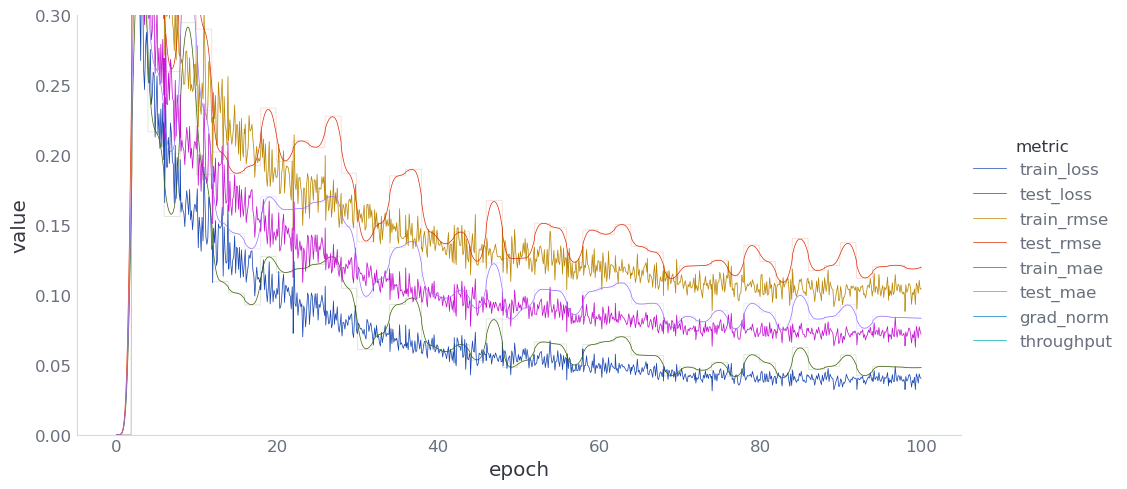

In [24]:
df = pd.read_feather('logs/e_form_equivariant_conv_971/metrics.feather')
test_cols = [col for col in df.columns if col.startswith('test_')]
df[test_cols] = np.where(df[test_cols] == 1, np.nan, df[test_cols])
mdf = df.melt(id_vars=['step', 'epoch'], var_name='metric')
separate_vars = ['lr', 'rel_mins']
sns.relplot(mdf[~mdf['metric'].isin(separate_vars)], hue='metric', x='epoch', y='value',
            kind='line', aspect=2, lw=0.5)

rp.smooth_noisy_lines()
plt.ylim(0, 0.3)

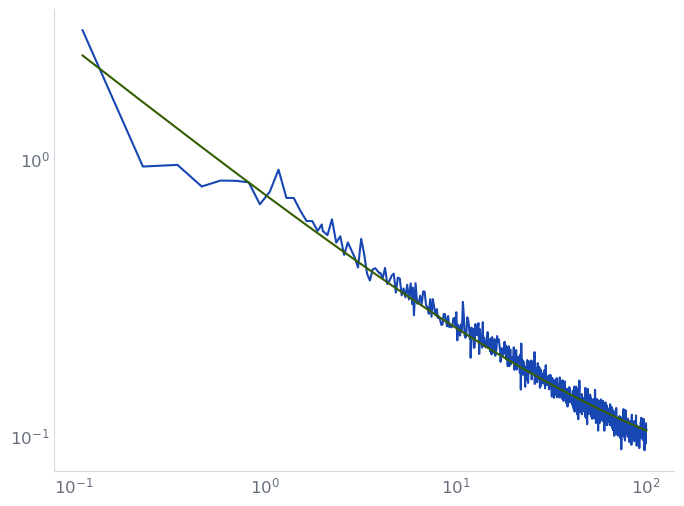

In [50]:
from symfit import parameters, variables, Fit, Model, log, exp
import numpy as np


yerr = 0.1

df = pd.read_feather('logs/e_form_equivariant_conv_971/metrics.feather').query('epoch > 0')
col = 'train_rmse'

a, b, c, d, e, f = parameters('a, b, c, d, e, f')
x, y = variables('x, y')
model = Model({y: a * (x + c ** 2) ** -b + d})

fit = Fit(model, x=df['epoch'].values, y=df[col].values, sigma_y=yerr, absolute_sigma=True)
fit_result = fit.execute()

yfit = model(x=df['epoch'], **fit_result.params)

plt.plot(df['epoch'], df[col])
plt.plot(df['epoch'], yfit.output[0])
# plt.ylim(0, 2)
plt.xscale('log')
plt.yscale('log')